In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dtale as dt
from pandas_profiling import ProfileReport
from pycaret.clustering import *

In [2]:
df = pd.read_csv('superstore_dataset.csv', encoding = 'latin-1')

array([[<AxesSubplot:title={'center':'Row ID'}>,
        <AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Shipping Cost'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

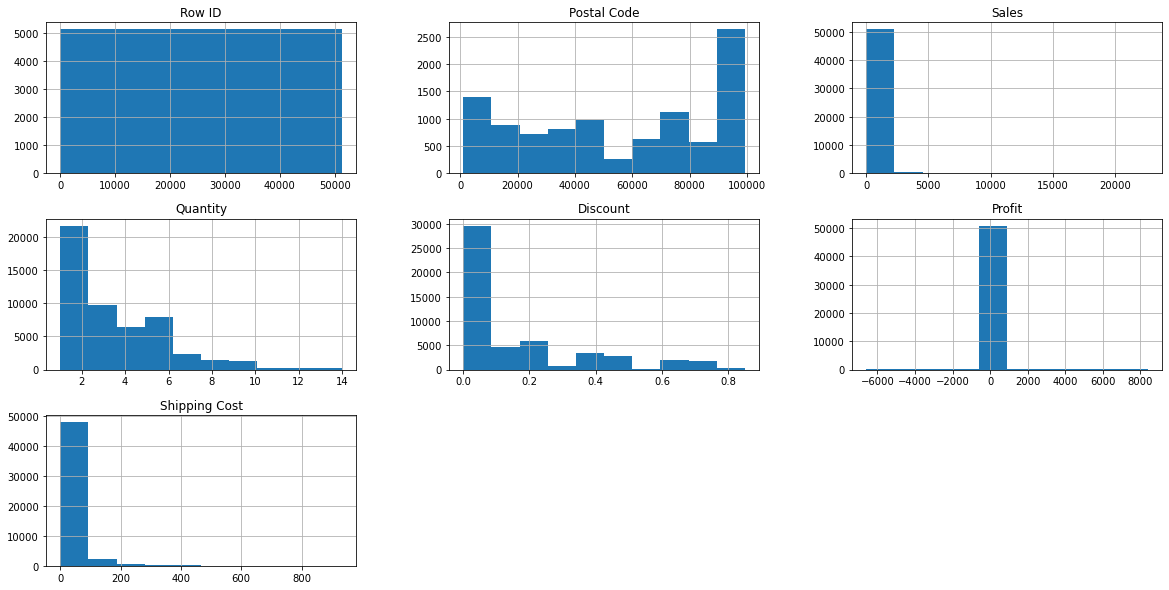

In [3]:
df.hist(figsize = (20, 10))
#pandas .hist function returns a histogram for the columns it is applicable

In [4]:
print(df.dtypes)
#the date columns are in object format and not date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date']) 

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


<AxesSubplot:xlabel='Category'>

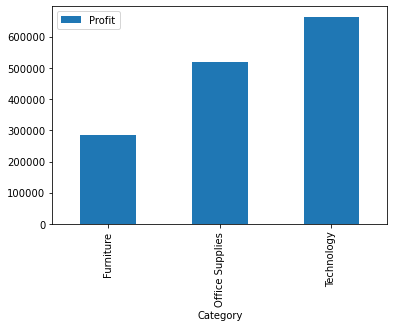

In [5]:
df.groupby(['Category'])[['Profit']].sum().plot(kind = 'bar')
#most profitable categories

In [6]:
df.describe()
#exploratory data analysis

Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
max     8399.976000     933.570000

<AxesSubplot:xlabel='Country'>

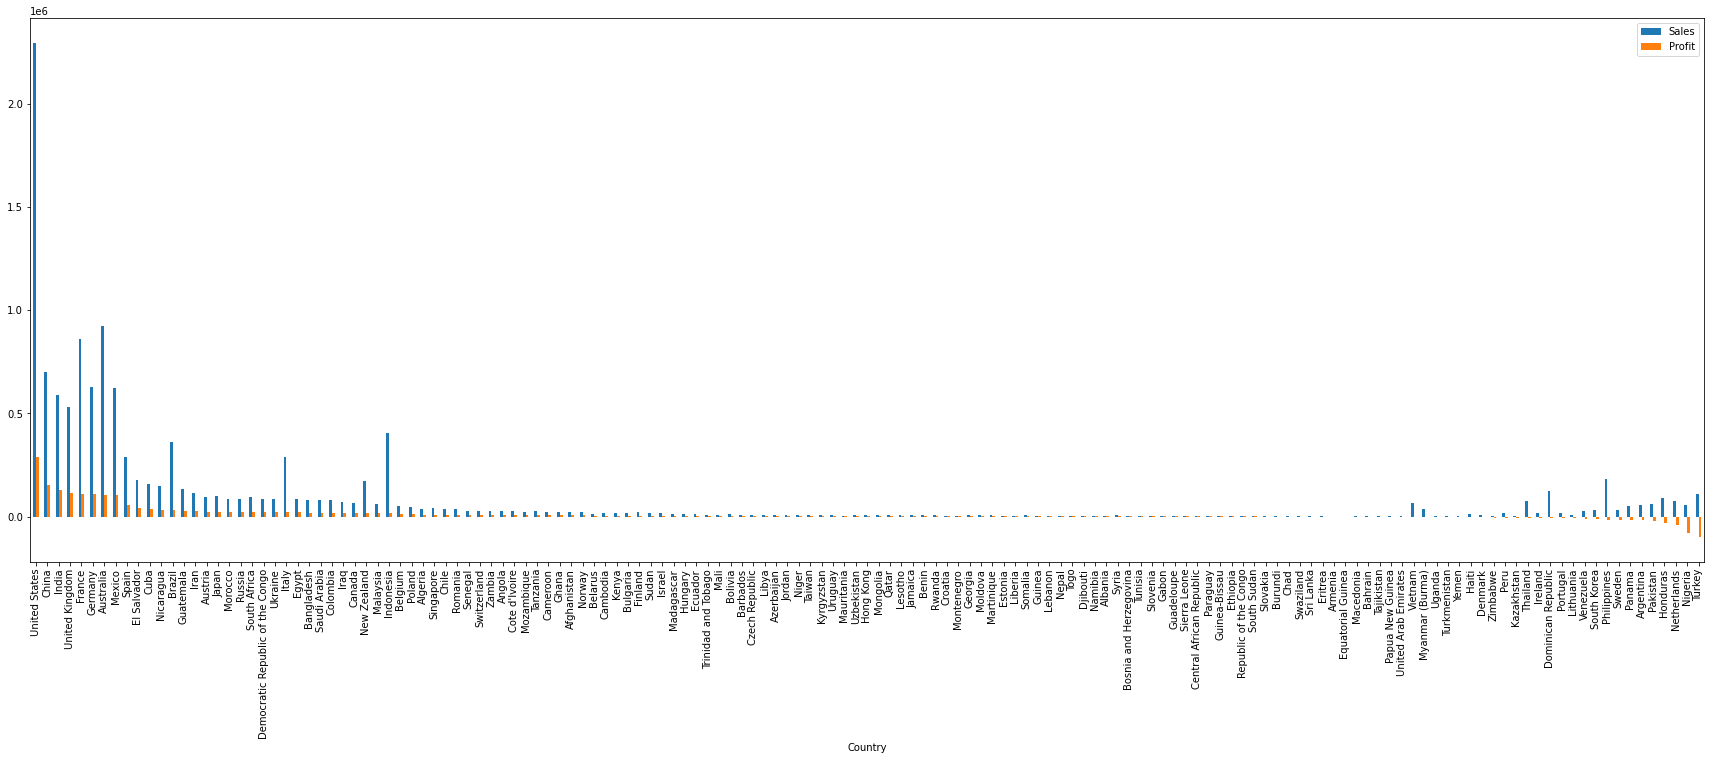

In [7]:
df.groupby(['Country'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending = False).plot(kind = 'bar', figsize = (30, 10))
#most profitable country segments - USA, China, India, UK and France make top 5 
#Turkey, Nigeria, Netherlands, HOnduras, and Pakistan are the least profitable posting losses

In [8]:
#identify duplicates with some key identifiers such as Order ID, Customer ID, and profit
df.drop('Row ID', axis = 1, inplace = True)
df.loc[df.duplicated(['Order ID', 'Customer ID', 'Profit'], keep = False)].sort_values('Order ID')

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
32840     AG-2014-4840 2014-08-20 2014-08-25  Standard Class     CD-2790   
32813     AG-2014-4840 2014-08-20 2014-08-25  Standard Class     CD-2790   
32830     AG-2014-4840 2014-08-20 2014-08-25  Standard Class     CD-2790   
32843     AG-2014-4840 2014-08-20 2014-08-25  Standard Class     CD-2790   
48055  ES-2012-2740636 2012-08-29 2012-05-09  Standard Class    RF-19840   
48047  ES-2012-2740636 2012-08-29 2012-05-09  Standard Class    RF-19840   
48630  ES-2013-2700361 2013-11-29 2013-01-12    Second Class    MP-17965   
48614  ES-2013-2700361 2013-11-29 2013-01-12    Second Class    MP-17965   
22523  ES-2013-2926991 2013-06-14 2013-06-21  Standard Class    SR-20740   
22520  ES-2013-2926991 2013-06-14 2013-06-21  Standard Class    SR-20740   
31431  ES-2014-2710870 2014-10-19 2014-10-25  Standard Class    MH-18025   
31432  ES-2014-2710870 2014-10-19 2014-10-25  Standard Class    MH-18025   
31062  ES-2014-5335914 2014-08-19 2014-08-21     First Class    BS-11800   
31077  ES-2014-5335914 2014-08-19 2014-08-21     First Class    BS-11800   
773      ID-2011-54176 2011-03-05 2011-09-05  Standard Class    AR-10510   
774      ID-2011-54176 2011-03-05 2011-09-05  Standard Class    AR-10510   
30963    IN-2011-12043 2011-08-19 2011-08-23  Standard Class    CS-11845   
30960    IN-2011-12043 2011-08-19 2011-08-23  Standard Class    CS-11845   
5211     IN-2012-38657 2012-05-11 2012-06-11     First Class    RM-19375   
5203     IN-2012-38657 2012-05-11 2012-06-11     First Class    RM-19375   
26643    IN-2013-13149 2013-12-16 2013-12-18    Second Class    JW-15955   
26669    IN-2013-13149 2013-12-16 2013-12-18    Second Class    JW-15955   
10109    IN-2013-66265 2013-06-06 2013-06-06        Same Day    SF-20200   
10094    IN-2013-66265 2013-06-06 2013-06-06        Same Day    SF-20200   
27416    IN-2014-13821 2014-06-17 2014-06-23  Standard Class    MB-18085   
27419    IN-2014-13821 2014-06-17 2014-06-23  Standard Class    MB-18085   
15455    IN-2014-65243 2014-04-12 2014-06-12    Second Class    BE-11455   
15436    IN-2014-65243 2014-04-12 2014-06-12    Second Class    BE-11455   
36451     IR-2012-1650 2012-09-22 2012-09-27    Second Class     CJ-1875   
36438     IR-2012-1650 2012-09-22 2012-09-27    Second Class     CJ-1875   
32697     IR-2012-4790 2012-08-20 2012-08-24  Standard Class     EM-4140   
32703     IR-2012-4790 2012-08-20 2012-08-24  Standard Class     EM-4140   
31299     IR-2014-3320 2014-09-19 2014-09-26  Standard Class    SR-10740   
31285     IR-2014-3320 2014-09-19 2014-09-26  Standard Class    SR-10740   
44062      IS-2014-420 2014-02-27 2014-01-03    Second Class     PB-9210   
44059      IS-2014-420 2014-02-27 2014-01-03    Second Class     PB-9210   
29938     IV-2013-6210 2013-11-18 2013-11-22  Standard Class     EC-4050   
29933     IV-2013-6210 2013-11-18 2013-11-22  Standard Class     EC-4050   
37164     KE-2013-2790 2013-02-23 2013-02-25    Second Class     PC-9000   
37162     KE-2013-2790 2013-02-23 2013-02-25    Second Class     PC-9000   
9569      MO-2013-8380 2013-05-03 2013-09-03  Standard Class    XP-11865   
9560      MO-2013-8380 2013-05-03 2013-09-03  Standard Class    XP-11865   
4532    MX-2012-137561 2012-03-12 2012-07-12  Standard Class    LS-17200   
4529    MX-2012-137561 2012-03-12 2012-07-12  Standard Class    LS-17200   
16520   MX-2014-152807 2014-06-11 2014-11-11  Standard Class    AH-10210   
16503   MX-2014-152807 2014-06-11 2014-11-11  Standard Class    AH-10210   
20134   MX-2014-159877 2014-01-13 2014-01-19  Standard Class    GG-14650   
20128   MX-2014-159877 2014-01-13 2014-01-19  Standard Class    GG-14650   
40991   MX-2014-161578 2014-06-25 2014-06-27     First Class    AG-10390   
40996   MX-2014-161578 2014-06-25 2014-06-27     First Class    AG-10390   
28330     PL-2013-7380 2013-12-17 2013-12-21  Standard Class     MK-8160   
28333     PL-2013-7380 2013-12-17 2013-12-21  Standard Class  

In [9]:
df.loc[df.duplicated(['Order ID', 'Order Date', 'Customer ID', 'Sales', 'Shipping Cost', 'Profit'], keep = False)]
#there seems to be no duplicates 

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority]
Index: []

<AxesSubplot:xlabel='Country'>

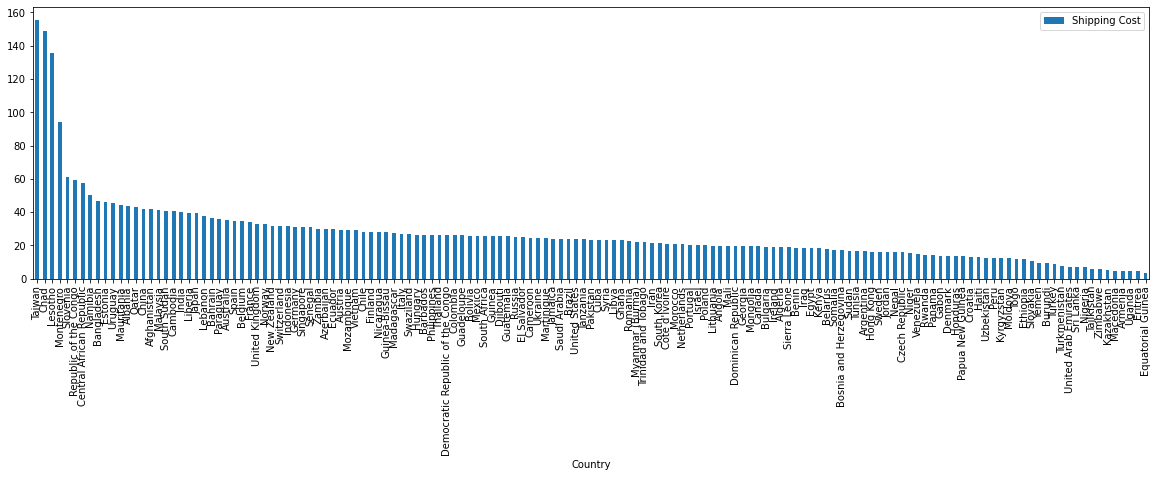

In [10]:
df.groupby(['Country'])[['Shipping Cost']].mean().sort_values('Shipping Cost', ascending = False).plot(kind = 'bar', figsize = (20, 5))
#returnsthe average cost of shipping to the different countries - Taiwan and Chad are the most expensive on avg

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [12]:
dt.show(df)
#using the dtale module for EDA - dtale is an incredible module for one-line code Exploratory Data Analysis
#other one-line eda modules include sweetviz and pandas-profiling
#dtale opens a new html window where further analysis and grouping can be done
#this analysis showed that tables makes the biggest losses out of all subcategories

In [13]:
report = ProfileReport(df)
#eda using pandas-profiling

In [14]:
report

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Sub-Category'>

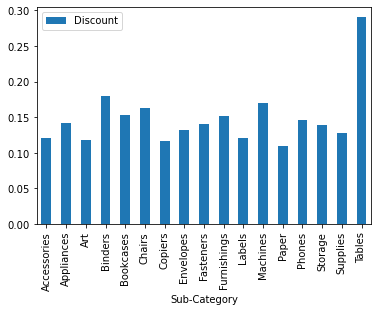

In [15]:
#a question arising out of EDA: why is tables the least profitable subcategory?
#columns that can answer - market, region, sales, quantity, discount, shipping cost
#eda using matplotlib - 
df.groupby(['Sub-Category'])[['Discount']].mean().plot(kind = 'bar')
#this shows that the tables sub-category on average as much higher discount rates than all the other subcategories 

<AxesSubplot:xlabel='Sub-Category'>

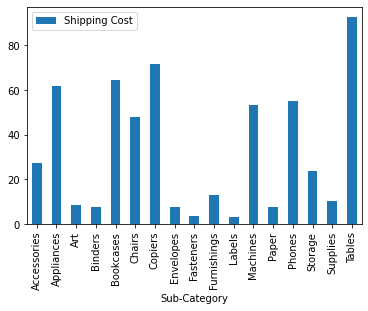

In [16]:
df.groupby('Sub-Category')[['Shipping Cost']].mean().plot(kind = 'bar')
#the shipping cost associated with tables is also the highest - the superstore must adopt a shipping method that means they absorb the risk and cost of shipping - maybe cif

<AxesSubplot:xlabel='Sub-Category'>

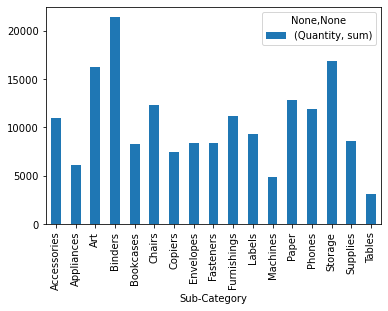

In [17]:
df.groupby('Sub-Category')[['Quantity']].agg([sum]).plot(kind = 'bar')
#tables has the lowest quantity of all subcategories

<AxesSubplot:xlabel='Sub-Category'>

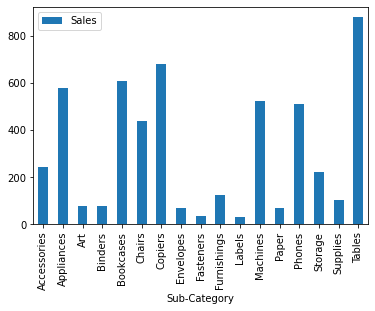

In [18]:
df.groupby('Sub-Category')[['Sales']].mean().plot(kind = 'bar')
#sales per order, on average, is highest with tables
#therefore, though there is a market for selling tables, the superstore has not reached enough scale to lower their costs and discount rates
#this may be a new market and so time may be needed before it is profitable

In [4]:
#perform a cluster analysis using kmeans clustering on the products currently sold by the superstore with variables such as sales, profit, region, and quantity
dfc = df.groupby('Product ID')[['Sales', 'Profit']].sum().join(df.groupby('Product ID')[['Region']].agg([lambda x: x.value_counts().index[0]]), how = 'left').join(df.groupby('Product ID')[['Quantity']].sum())
dfc.columns = ['Sales', 'Profit', 'Region: Mode', 'Quantity']

In [5]:
cl = setup(dfc, numeric_features = ['Sales', 'Profit', 'Quantity'])

In [6]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6911         14201.8015          0.6714            0           0   

   Completeness  
0             0

In [6]:
dfkm = assign_model(kmeans)

In [7]:
plot_model(kmeans, plot = 'cluster')

In [8]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [11]:
dfkm = assign_model(kmeans)

In [21]:
pd.set_option('display.float_format', '{:,.2f}'.format)
dfkm.groupby('Cluster')[['Sales', 'Profit', 'Quantity']].mean().join(dfkm.groupby('Cluster')[['Sales', 'Profit', 'Quantity']].sum(), how = 'left', rsuffix = ' Sum')
#here is a summary of the cluster analysis
#cluster 3 has the highest averages sales, profit, and quantity per product but the lowest turnover and total quantity of sales
#this indicates that these products have a higher profit margin but lower turnover
#whereas clusters 0 and 2 are more lower-margin and higher volume products
#interesting finding - cluster 1 have a high average profit, sales and quantity while total quantity sold is relatively low
#cluster 1 products may present an opportunity for further scaling, higher volume and supply 

Sales   Profit  Quantity    Sales Sum  Profit Sum  Quantity Sum
Cluster                                                                      
Cluster 0    438.40    38.40     15.43 3,531,314.20  309,293.77        124270
Cluster 1  7,084.77   928.35     28.74 3,294,417.10  431,681.66         13366
Cluster 2  2,759.21   324.35     22.53 4,701,693.30  552,695.67         38395
Cluster 3 16,398.20 2,555.68     33.54 1,115,077.31  173,786.20          2281